In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
from pycaret.classification import *
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [2]:
df=pd.read_csv("Training.csv")

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [7]:
df=df.drop(['Unnamed: 133'] , axis=1)

In [8]:
df['prognosis'].nunique()

41

In [9]:
#df.hist(bins=50, figsize=(35, 35))
#plt.show()

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(df, df["prognosis"]):
    strat_train_set = df.loc[train_index]
    strat_validation_set = df.loc[test_index]

In [11]:
strat_train_set['prognosis'].count()

4428

In [12]:
strat_validation_set['prognosis'].count()

492

In [13]:
x_train=strat_train_set.drop(["prognosis"] , axis=1)
y_train=strat_train_set["prognosis"]

x_val=strat_validation_set.drop(["prognosis"] , axis=1)
y_val=strat_validation_set["prognosis"]

In [14]:
model=DecisionTreeClassifier()
model1=LogisticRegression()

In [15]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
model1.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(x_val)
y_pred1=model1.predict(x_val)

In [18]:
accuracy_score(y_val,y_pred)

1.0

In [19]:
accuracy_score(y_val,y_pred1)

1.0

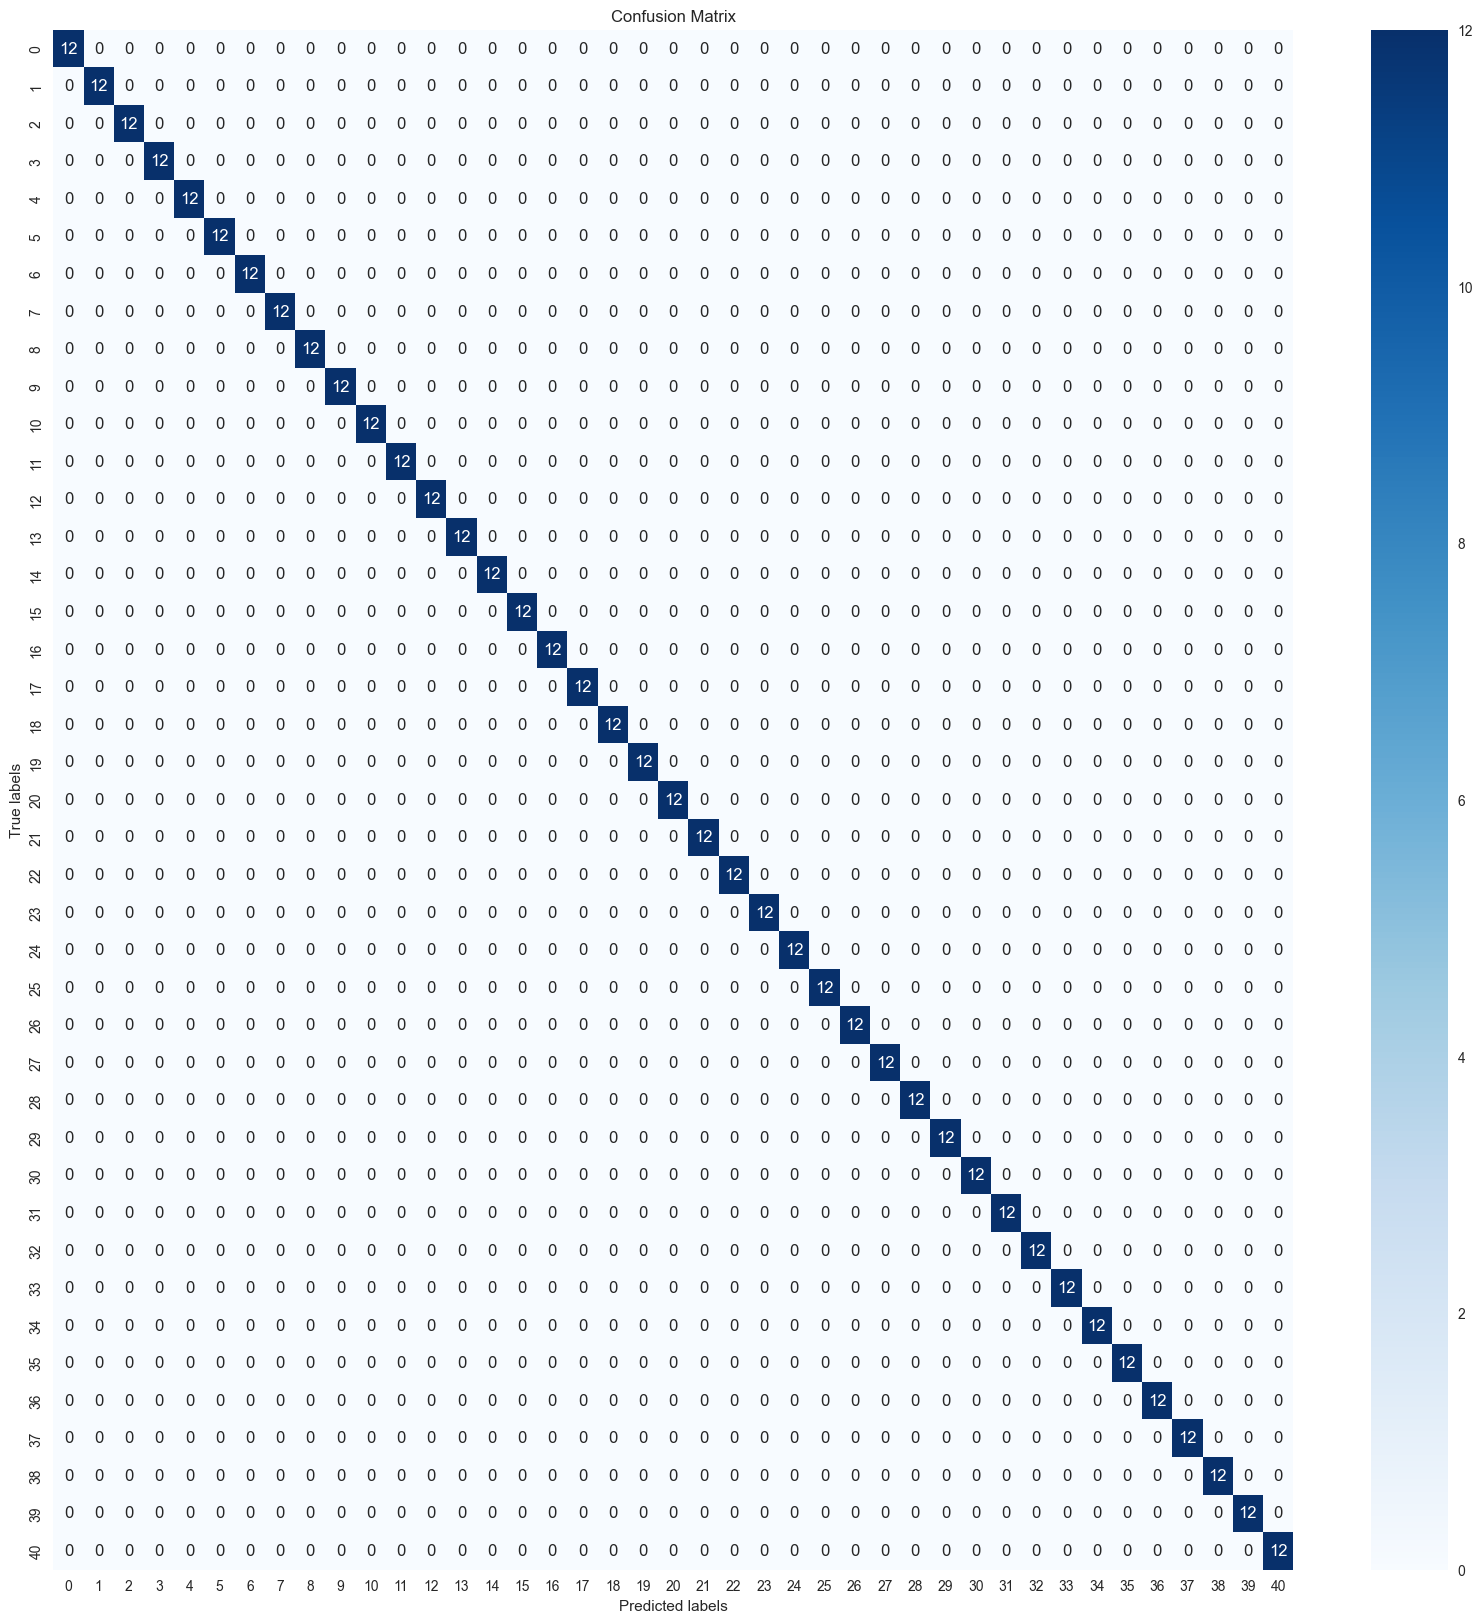

In [20]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from pycaret.utils import version
version()

'3.2.0'

In [22]:
exp = ClassificationExperiment()
exp.setup(df,  target='prognosis', session_id=555, train_size=0.8, preprocess=True)


,Description,Value
0,Session id,555
1,Target,prognosis
2,Target type,Multiclass
3,Target mapping,"(vertigo) Paroymsal Positional Vertigo: 0, AIDS: 1, Acne: 2, Alcoholic hepatitis: 3, Allergy: 4, Arthritis: 5, Bronchial Asthma: 6, Cervical spondylosis: 7, Chicken pox: 8, Chronic cholestasis: 9, Common Cold: 10, Dengue: 11, Diabetes : 12, Dimorphic hemmorhoids(piles): 13, Drug Reaction: 14, Fungal infection: 15, GERD: 16, Gastroenteritis: 17, Heart attack: 18, Hepatitis B: 19, Hepatitis C: 20, Hepatitis D: 21, Hepatitis E: 22, Hypertension : 23, Hyperthyroidism: 24, Hypoglycemia: 25, Hypothyroidism: 26, Impetigo: 27, Jaundice: 28, Malaria: 29, Migraine: 30, Osteoarthristis: 31, Paralysis (brain hemorrhage): 32, Peptic ulcer diseae: 33, Pneumonia: 34, Psoriasis: 35, Tuberculosis: 36, Typhoid: 37, Urinary tract infection: 38, Varicose veins: 39, hepatitis A: 40"
4,Original data shape,"(4920, 133)"
5,Transformed data shape,"(4920, 133)"
6,Transformed train set shape,"(3936, 133)"
7,Transformed test set shape,"(984, 133)"
8,Numeric features,132
9,Preprocess,True


In [23]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [24]:
best=exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9020
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3970
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0240
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0240
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0490
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1050
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.0920
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1380
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.4030
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,15.7600


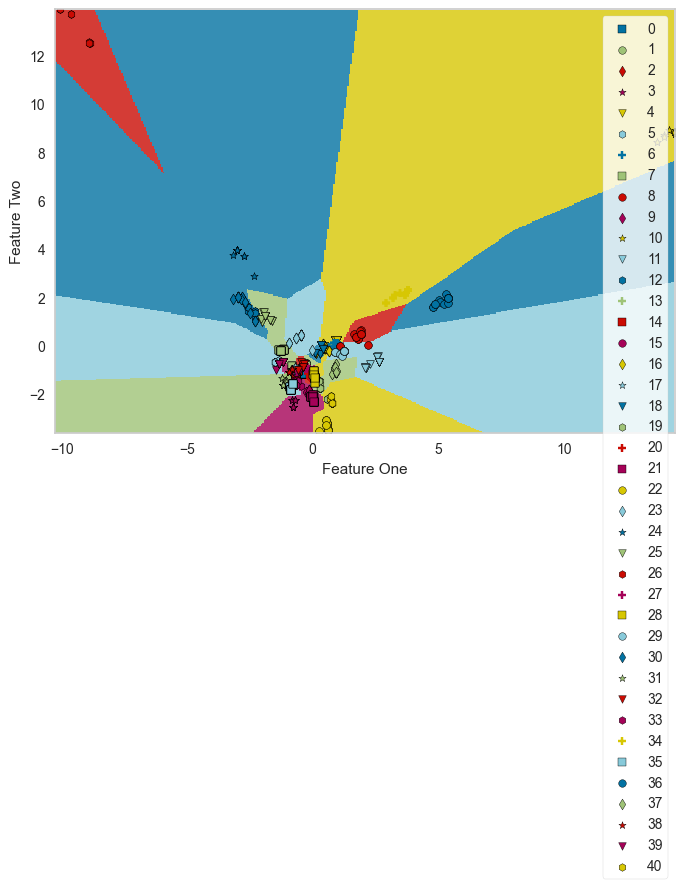

In [25]:
exp.plot_model(best, plot = 'boundary')

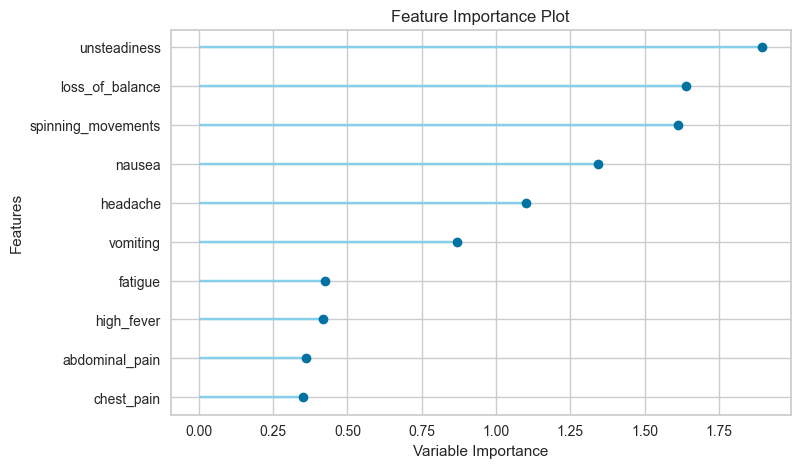

In [27]:
exp.plot_model(best, plot = 'feature')

predicting on unseen data

In [29]:
test=pd.read_csv("Testing.csv")

In [31]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [34]:
x_test=test.drop(['prognosis'] , axis=1)
y_test=test["prognosis"]

Decision tree model

In [37]:
y_pred=model.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9761904761904762

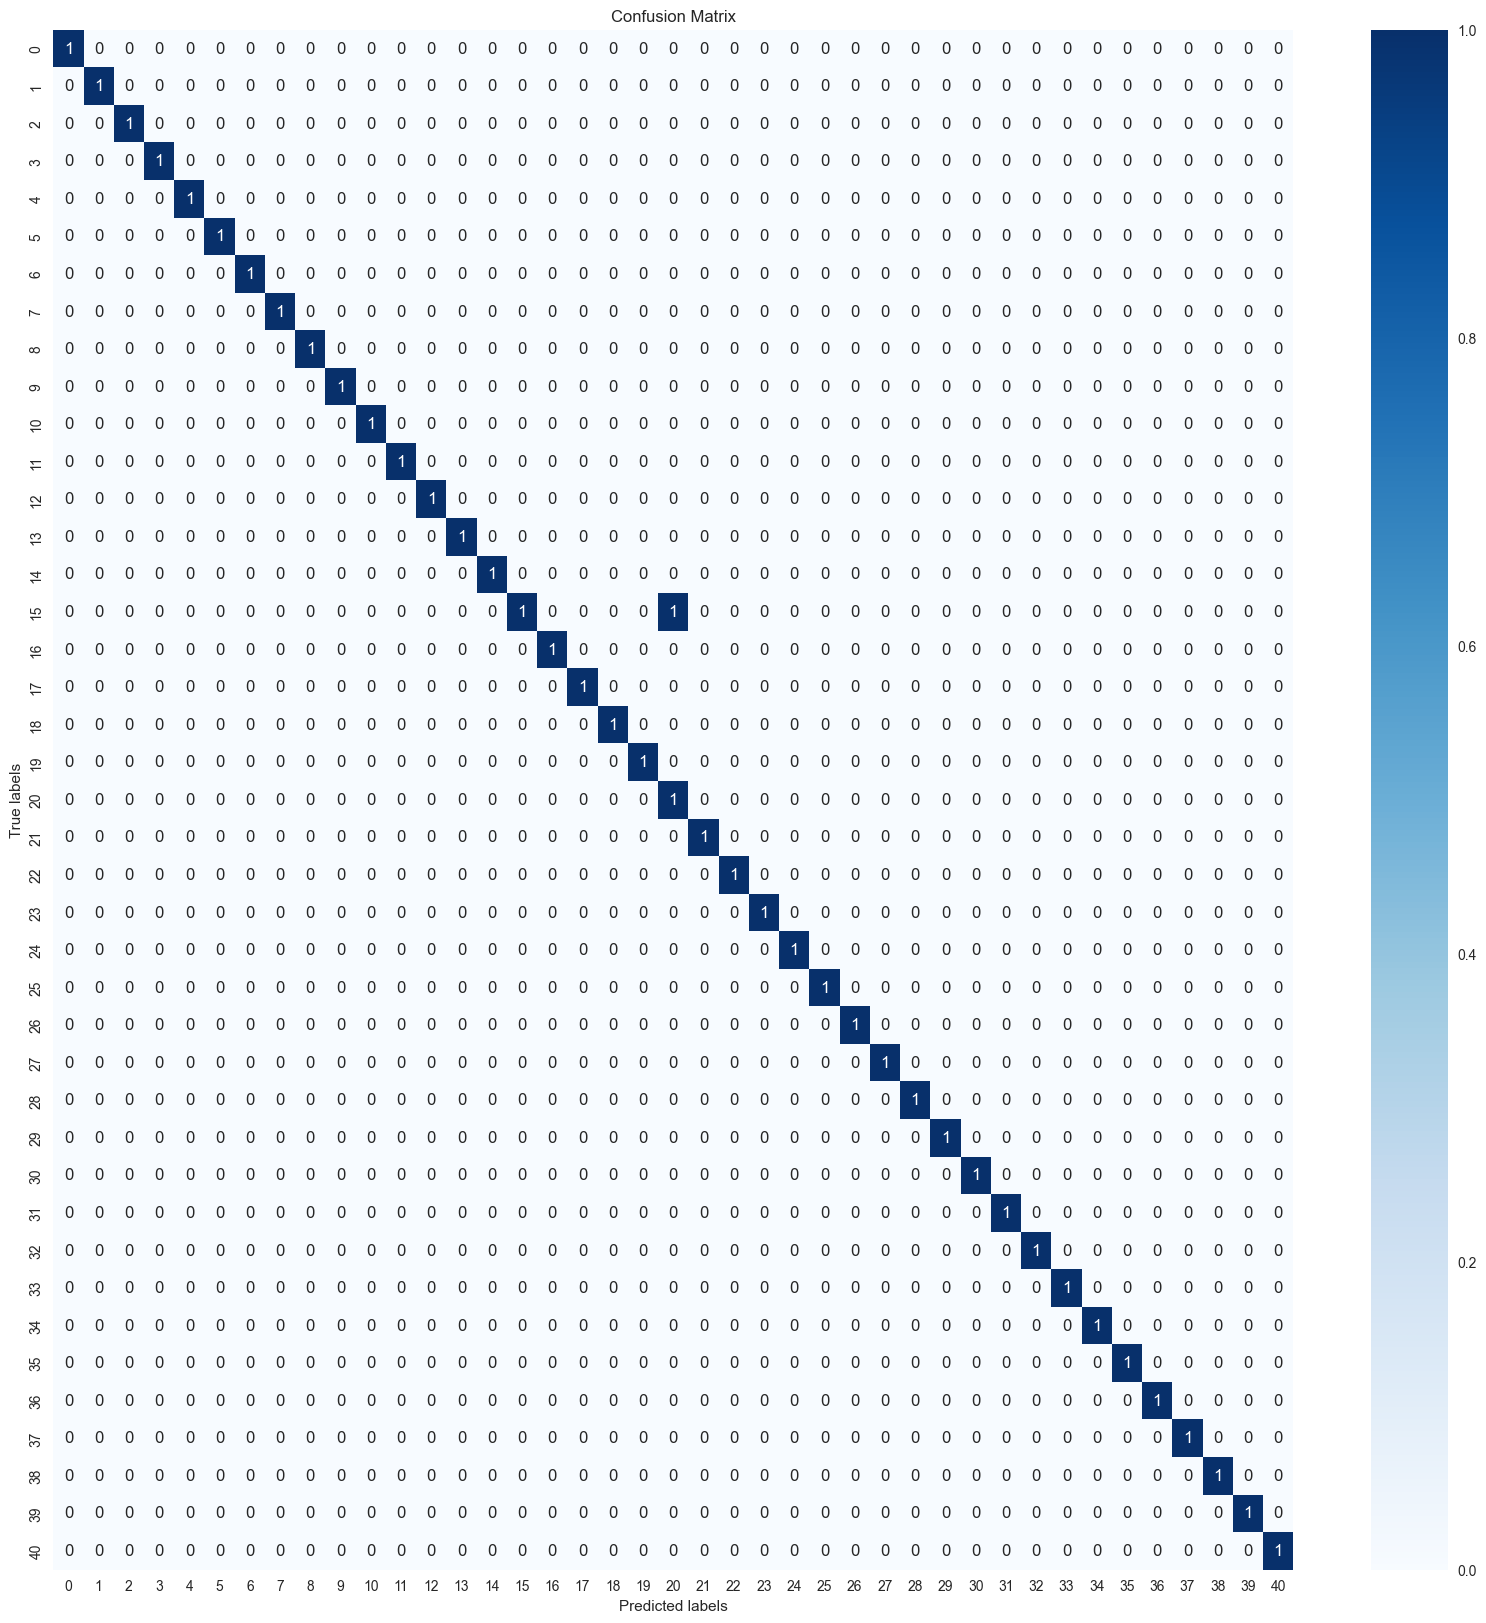

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Logistic regression model

In [41]:
y_pred1=model1.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred1)

1.0

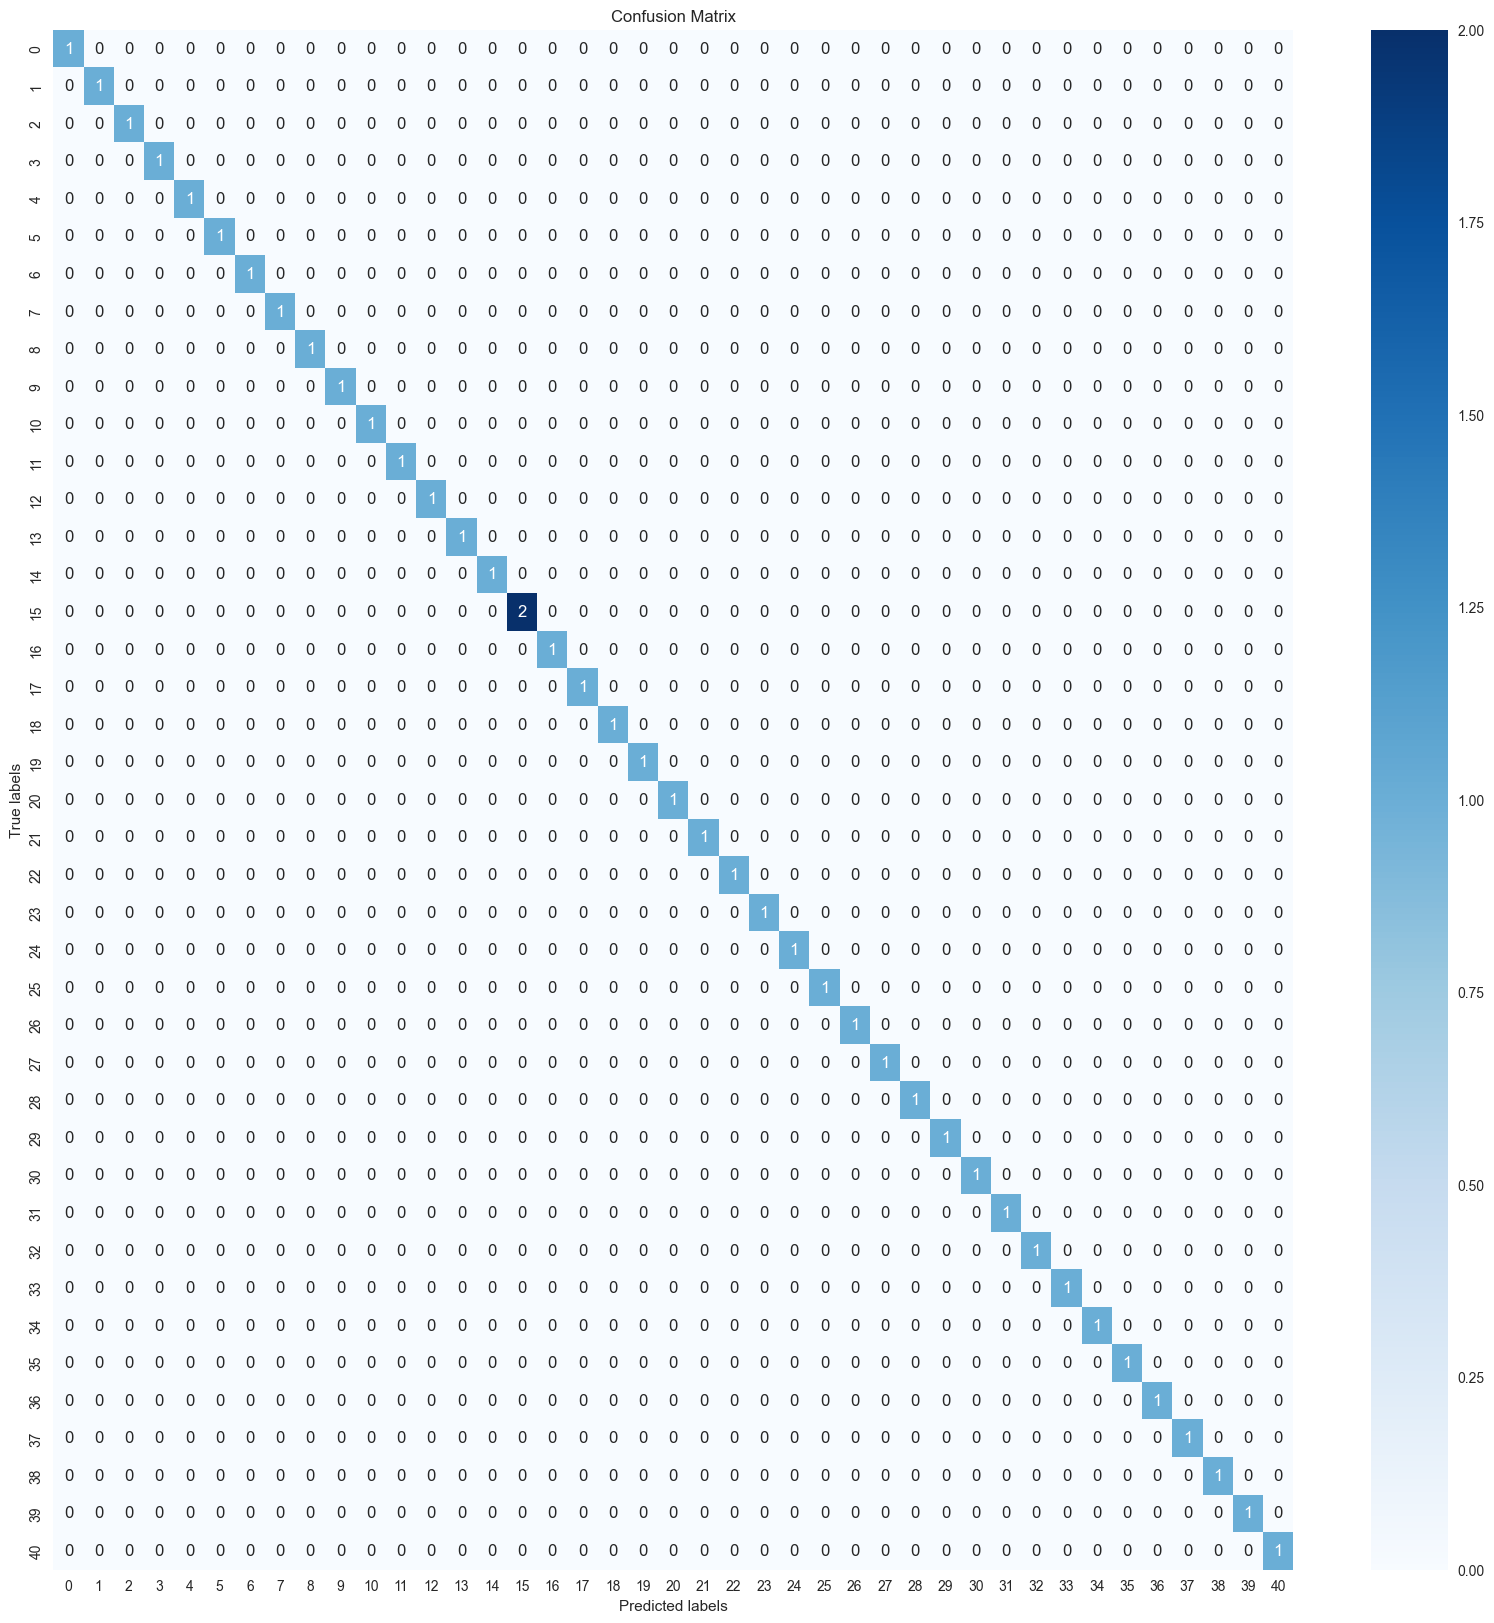

In [43]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic regression best model fits this problem